## Функции Активации

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch

In [3]:
import numpy as np

## MLP

## Данные

In [4]:
import torchvision as tv

In [5]:
import time

In [6]:
BATCH_SIZE=256

In [7]:
train_dataset = tv.datasets.MNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.MNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

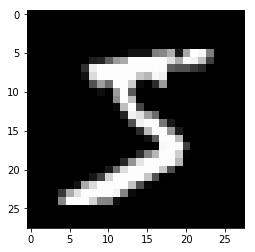

In [8]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

## Модель

In [9]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

In [10]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.SGD(model.parameters(), lr=0.5)
num_epochs = 10

In [11]:
for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.4309862635871197, train_acc: 0.87585, test_loss: 0.24166723182424904, test_acc: 0.925
ep: 1, train_loss: 0.18669128712028898, train_acc: 0.9456166666666667, test_loss: 0.17019917559809983, test_acc: 0.946
ep: 2, train_loss: 0.13498719413863852, train_acc: 0.9612666666666667, test_loss: 0.13370721803512425, test_acc: 0.9589
ep: 3, train_loss: 0.10659929060951827, train_acc: 0.9696333333333333, test_loss: 0.11125230329344049, test_acc: 0.9669
ep: 4, train_loss: 0.08795927095603435, train_acc: 0.9753333333333334, test_loss: 0.09857246611500159, test_acc: 0.9699
ep: 5, train_loss: 0.07452432454583492, train_acc: 0.97955, test_loss: 0.08938360598986037, test_acc: 0.9717
ep: 6, train_loss: 0.06431908229405575, train_acc: 0.9823, test_loss: 0.08353505390696228, test_acc: 0.9729
ep: 7, train_loss: 0.05623939800809356, train_acc: 0.9847833333333333, test_loss: 0.07920555018936284, test_acc: 0.9737
ep: 8, train_loss: 0.04950333736797279, train_acc: 0.9867, test_loss: 0.07614

## Практика - попробуйте заменить SGD на Adam и RMSProp. Увеличиться ли скорость сходимости?

In [20]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.01)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.25080450120917025, train_acc: 0.92355, test_loss: 0.1264035524567589, test_acc: 0.9585
ep: 1, train_loss: 0.10340622668451768, train_acc: 0.9681, test_loss: 0.10760416284319944, test_acc: 0.9658
ep: 2, train_loss: 0.07058307981673391, train_acc: 0.9779333333333333, test_loss: 0.11538263393449597, test_acc: 0.9667
ep: 3, train_loss: 0.06191025254059028, train_acc: 0.98, test_loss: 0.10727834534591238, test_acc: 0.9708
ep: 4, train_loss: 0.05120745299066952, train_acc: 0.9836666666666667, test_loss: 0.13070226087147602, test_acc: 0.9671
ep: 5, train_loss: 0.043769214202976844, train_acc: 0.9855833333333334, test_loss: 0.12335631331879995, test_acc: 0.9717
ep: 6, train_loss: 0.04284865043938477, train_acc: 0.98615, test_loss: 0.12813780421729462, test_acc: 0.9715
ep: 7, train_loss: 0.04052430184240988, train_acc: 0.9875, test_loss: 0.14356009380444448, test_acc: 0.971
ep: 8, train_loss: 0.04228798452284227, train_acc: 0.9873333333333333, test_loss: 0.13803879640656191

In [19]:
trainer = torch.optim.RMSprop(model.parameters(), lr=0.2)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 2.279527799119341, train_acc: 0.12528333333333333, test_loss: 2.2109234809875487, test_acc: 0.1415
ep: 1, train_loss: 2.211874538279594, train_acc: 0.15306666666666666, test_loss: 3.869586092233658, test_acc: 0.0985
ep: 2, train_loss: 2.19831867420927, train_acc: 0.16286666666666666, test_loss: 2.3614763498306273, test_acc: 0.1136
ep: 3, train_loss: 2.195650422826726, train_acc: 0.1582, test_loss: 2.2275931745767594, test_acc: 0.1685
ep: 4, train_loss: 2.1597589396415873, train_acc: 0.16863333333333333, test_loss: 2.173701900243759, test_acc: 0.1608
ep: 5, train_loss: 2.181040886615185, train_acc: 0.16638333333333333, test_loss: 2.1918744534254073, test_acc: 0.1623
ep: 6, train_loss: 2.1424456687683753, train_acc: 0.17105, test_loss: 2.1645167589187624, test_acc: 0.1736
ep: 7, train_loss: 2.1898340879602634, train_acc: 0.1609, test_loss: 2.1706851541996004, test_acc: 0.167
ep: 8, train_loss: 2.1712705617255352, train_acc: 0.17318333333333333, test_loss: 2.15085906386

## Практика - попробуйте сделать больше слоев в сети  - увеличиться ли качество?

In [22]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 10)
)
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.005)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.305743956359777, train_acc: 0.9070833333333334, test_loss: 0.17579629695974291, test_acc: 0.9429
ep: 1, train_loss: 0.1120194943106555, train_acc: 0.96565, test_loss: 0.10864541182527318, test_acc: 0.9653
ep: 2, train_loss: 0.07058025718607167, train_acc: 0.9780666666666666, test_loss: 0.10698354791093152, test_acc: 0.9687
ep: 3, train_loss: 0.052564371367322005, train_acc: 0.9837666666666667, test_loss: 0.10261412283871323, test_acc: 0.9702
ep: 4, train_loss: 0.046156433185047294, train_acc: 0.9852, test_loss: 0.09760832715473952, test_acc: 0.9745
ep: 5, train_loss: 0.04277153908215622, train_acc: 0.9854166666666667, test_loss: 0.10411228489829227, test_acc: 0.9727
ep: 6, train_loss: 0.03663195989520705, train_acc: 0.988, test_loss: 0.1072450497027603, test_acc: 0.9735
ep: 7, train_loss: 0.028125066130838178, train_acc: 0.9906666666666667, test_loss: 0.1368720044614747, test_acc: 0.9674
ep: 8, train_loss: 0.02545388491175316, train_acc: 0.9919666666666667, test_lo

## Практика - попробуйте добавить регуляризацию, dropout и/или batchnorm-слои. Увеличится ли качество?

In [25]:
model = torch.nn.Sequential(
    torch.nn.Dropout(p=0.1),
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 64),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.3),
    torch.nn.Linear(64, 10)
)
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.005)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.36129778772592547, train_acc: 0.89165, test_loss: 0.184076386410743, test_acc: 0.9423
ep: 1, train_loss: 0.15256415629323491, train_acc: 0.9554666666666667, test_loss: 0.13766718762926758, test_acc: 0.9584
ep: 2, train_loss: 0.11100380987008202, train_acc: 0.9676666666666667, test_loss: 0.1257155285682529, test_acc: 0.9636
ep: 3, train_loss: 0.09043403954264966, train_acc: 0.9735333333333334, test_loss: 0.11387960741994903, test_acc: 0.9666
ep: 4, train_loss: 0.0779563533142209, train_acc: 0.9762166666666666, test_loss: 0.10550365889430395, test_acc: 0.971
ep: 5, train_loss: 0.0672012742569155, train_acc: 0.9790833333333333, test_loss: 0.10992527747730492, test_acc: 0.968
ep: 6, train_loss: 0.06073801579112385, train_acc: 0.9812, test_loss: 0.09906497797346674, test_acc: 0.9723
ep: 7, train_loss: 0.058899030592688854, train_acc: 0.9806333333333334, test_loss: 0.1216526282747509, test_acc: 0.971
ep: 8, train_loss: 0.048996903998975425, train_acc: 0.9847666666666667,

In [ ]:
model = torch.nn.Sequential(
    #torch.nn.Dropout(p=0.1),
    #torch.nn.BatchNorm1d(),
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 64),
    torch.nn.ReLU(),
    #torch.nn.Dropout(p=0.3),
    torch.nn.Linear(64, 10)
)
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.005)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

In [40]:
BATCH_SIZE=256

In [27]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

  0%|          | 0/26421880 [00:00<?, ?it/s]

26427392it [00:03, 7315627.56it/s]                              


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw


  0%|          | 0/29515 [00:00<?, ?it/s]

32768it [00:00, 153556.21it/s]           
  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw


4423680it [00:00, 5454038.95it/s]                             
8192it [00:00, 63595.70it/s]            


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw
Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!


In [53]:
model = torch.nn.Sequential(
    #torch.nn.Dropout(p=0.15),
    torch.nn.Flatten(),
    torch.nn.BatchNorm1d(784),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(256),
    torch.nn.Linear(256, 64),
    torch.nn.ReLU(),
    #torch.nn.Dropout(p=0.3),
    torch.nn.BatchNorm1d(64),
    torch.nn.Linear(64, 10)
)
print(model)
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.001)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

Sequential(
  (0): Flatten()
  (1): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Linear(in_features=784, out_features=256, bias=True)
  (3): ReLU()
  (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Linear(in_features=256, out_features=64, bias=True)
  (6): ReLU()
  (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Linear(in_features=64, out_features=10, bias=True)
)
ep: 0, train_loss: 0.47749507972534666, train_acc: 0.8384666666666667, test_loss: 0.39075520932674407, test_acc: 0.8596
ep: 1, train_loss: 0.32645542685021745, train_acc: 0.8814, test_loss: 0.3596591901034117, test_acc: 0.8704
ep: 2, train_loss: 0.28162298322992124, train_acc: 0.8973833333333333, test_loss: 0.34650804474949837, test_acc: 0.8762
ep: 3, train_loss: 0.2508826104884452, train_acc: 0.90885, test_loss: 0.33921575024724004, test_acc: 0.8777
ep: 4, train_loss: 0.22665399636359926, train_

In [54]:
trainer = torch.optim.SGD(model.parameters(), lr=0.005)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.1373146324557193, train_acc: 0.9496833333333333, test_loss: 0.3505227343179286, test_acc: 0.8878
ep: 1, train_loss: 0.12304901021750683, train_acc: 0.9555, test_loss: 0.34542447738349435, test_acc: 0.8889
ep: 2, train_loss: 0.11637508004428225, train_acc: 0.9582666666666667, test_loss: 0.343269501067698, test_acc: 0.8895
ep: 3, train_loss: 0.11178575484676564, train_acc: 0.9602333333333334, test_loss: 0.34235506048426034, test_acc: 0.8904
ep: 4, train_loss: 0.10826269449230204, train_acc: 0.9618833333333333, test_loss: 0.34213403444737195, test_acc: 0.8901
ep: 5, train_loss: 0.10538770381281985, train_acc: 0.9632, test_loss: 0.3423170618712902, test_acc: 0.8904
ep: 6, train_loss: 0.10291622787555482, train_acc: 0.9644, test_loss: 0.3427231838926673, test_acc: 0.8907
ep: 7, train_loss: 0.10076225126518848, train_acc: 0.9652, test_loss: 0.3433120801113546, test_acc: 0.8912
ep: 8, train_loss: 0.09884346362916713, train_acc: 0.9660833333333333, test_loss: 0.34400788238

In [55]:
trainer = torch.optim.Adam(model.parameters(), lr=0.0005)

for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.11713985025565675, train_acc: 0.9583666666666667, test_loss: 0.3757933542132378, test_acc: 0.8883
ep: 1, train_loss: 0.09806427877951175, train_acc: 0.9661666666666666, test_loss: 0.39390783868730067, test_acc: 0.8873
ep: 2, train_loss: 0.08442707049085739, train_acc: 0.9720333333333333, test_loss: 0.40874220747500656, test_acc: 0.8861
ep: 3, train_loss: 0.07356942698676536, train_acc: 0.9765, test_loss: 0.43760117068886756, test_acc: 0.8849
ep: 4, train_loss: 0.06315076211665539, train_acc: 0.9797666666666667, test_loss: 0.4673977652564645, test_acc: 0.8841
ep: 5, train_loss: 0.0551292428984604, train_acc: 0.9830666666666666, test_loss: 0.4877183087170124, test_acc: 0.8843
ep: 6, train_loss: 0.04905917105126254, train_acc: 0.9855, test_loss: 0.5215748764574528, test_acc: 0.882
ep: 7, train_loss: 0.04808309673272232, train_acc: 0.9850333333333333, test_loss: 0.5312640104442835, test_acc: 0.8828
ep: 8, train_loss: 0.04618289453631386, train_acc: 0.9855833333333334, 